In [1]:
import sys
import os

In [2]:
sys.path.insert(0,'/srv/scratch/manyu/NIPS_workshop_tests/motif_analysis/')

In [3]:
from importance_score_utils import *

Using TensorFlow backend.
/users/manyu/anaconda3/envs/pwm_utils/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
DEFER_DELETE_SIZE=int(250 * 1e6)
def create_tensorflow_session(visiblegpus):
    os.environ['CUDA_VISIBLE_DEVICES'] = str(visiblegpus)
    session_config = tf.ConfigProto()
    session_config.gpu_options.deferred_deletion_bytes = DEFER_DELETE_SIZE
    session_config.gpu_options.per_process_gpu_memory_fraction = .45
    session = tf.Session(config=session_config)
    K.set_session(session)
    return session

sess = create_tensorflow_session(0)

In [5]:
path_to_model_arch = '/users/manyu/oak_local/train_H1_GM/train_models_H1/ENCSR000ECC_NRF1/logdir_seq_meth_revcomp_ENCSR000ECC_NRF1_pos_samp0.2/model.arch.yaml'
path_to_model_weights = '/users/manyu/oak_local/train_H1_GM/train_models_H1/ENCSR000ECC_NRF1/logdir_seq_meth_revcomp_ENCSR000ECC_NRF1_pos_samp0.2/model.weights.h5'
model = load_model(path_to_model_arch,path_to_model_weights)

In [6]:
path_to_intervals = '/users/manyu/oak_local/train_H1_GM/label_regions/H1/labeled_intervals/ENCSR000ECC_NRF1_H1_bin200_flank400_stride200.H1.intervals.bed'
path_to_labels = '/users/manyu/oak_local/train_H1_GM/label_regions/H1/labeled_intervals/ENCSR000ECC_NRF1_H1_bin200_flank400_stride200.H1.labels.npy'

In [7]:
pos_file = create_pos_intervals_bed(path_to_intervals,path_to_labels,test_chroms=['chr9'])


Created positive intervals file for the test chroms


In [8]:
path_to_genome = '/srv/scratch/manyu/memmap_bcolz/GRCh38.genome.fa'
path_to_methylation = '/srv/scratch/manyu/memmap_bcolz/H1-hESC-WGBS-HAIB-rep1+rep2.normalized.bigWig/'

In [9]:
scores_dict = get_importance_scores(path_to_genome,path_to_methylation,pos_file,model)
concat_scores_dict =  get_concat_scores(scores_dict)

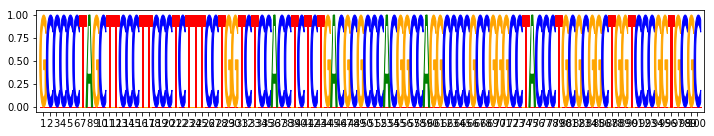

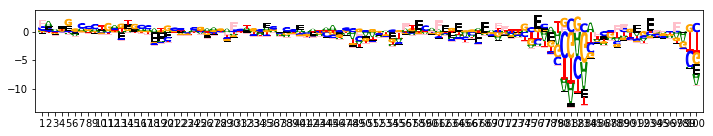

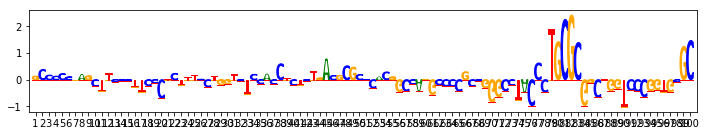

In [35]:
index = 40
lower = 400
upper = 500

fig = seqlogo_fig(concat_scores_dict['raw'][index][lower:upper],vocab = 'Meth_6_channel')
fig_input_grad_seq = seqlogo_fig(concat_scores_dict['grad'][index][lower:upper],vocab='Meth_6_channel')
fig_seq_meth = seqlogo_fig(concat_scores_dict['input_grad'][index][lower:upper],vocab='Meth_6_channel')

In [15]:
meth  = scores_dict['raw']['meth']

In [12]:
def methylateCpG(scores_dict,locs,vals):
    mod_scores = deepcopy(scores_dict)
    for idx,val in zip(locs,vals):
        if mod_scores['raw']['seq'][idx[0],:,][]

SyntaxError: invalid syntax (<ipython-input-12-4a7ec51f0d9b>, line 4)

In [14]:
np.argsort(-1*meth_sum)

NameError: name 'meth_sum' is not defined

In [16]:

index = 4
loc_idxs = np.arange(408,410)
locs = [(index,i) for i in loc_idxs]
vals = [1.0]*len(locs)

In [17]:
mod_scores = get_modified_importance_scores(scores_dict,locs,vals,model)

In [18]:
preds,preds_mod  = get_preds(scores_dict,model),get_preds(mod_scores,model)

In [37]:
np.log(preds_mod[4]/preds[4]),preds[4],preds_mod[4]

(-0.25513104, 0.9966462, 0.7722164)

In [20]:
def map_one_hot_to_seq(one_hot_seq):
    string =''
    assert one_hot_seq.shape[0]==4
    encoding = {(1,0,0,0):'a',(0,1,0,0):'c',(0,0,1,0):'g',(0,0,0,1):'t'}
    for i in one_hot_seq.transpose():
        string+=encoding[tuple(i)]
    return(string)    
        

In [21]:
seq = map_one_hot_to_seq(scores_dict['raw']['seq'][4])

In [22]:
seq[400:410],mod_scores['raw']['meth'][4][400:411]

('tcatggctgc',
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.], dtype=float32))

In [23]:
seq[409]

'c'

In [24]:
%load_ext autoreload
%autoreload 2

import pwm_utils
from pwm_utils import run_pipeline_with_all_pos_intervals
from pwm_utils import plot_and_save_information_content_pwms

In [25]:
path_to_modelspec = '/users/manyu/oak_local/train_H1_GM/train_models_H1/ENCSR000ECC_NRF1/logdir_seq_meth_revcomp_ENCSR000ECC_NRF1_pos_samp0.2/modelspec.json'

In [26]:
path_to_datasetpec = '/users/manyu/oak_local/train_H1_GM/train_models_H1/ENCSR000ECC_NRF1/logdir_seq_meth_revcomp_ENCSR000ECC_NRF1_pos_samp0.2/datasetspec.json'

In [33]:
os.makedirs('./NRF1_motifs')
run_pipeline_with_all_pos_intervals(path_to_modelspec,
                                    path_to_model_arch,path_to_model_weights,
                                    path_to_intervals,path_to_labels,
                                    ['chr9'],path_to_datasetpec,
                                    savedir='./NRF1_motifs',path_to_pos_intervals=None,
                                    path_to_memmapped_data='',path_to_methylation_bigwig = None,
                                    meth_threshold = 0.0)

Loading model 

Wrote to ./tmp_intervals/pos_intervals.bed
Total sequences is 221
Creating positive intervals set

Creating intervals list 

Reshaping Intervals and filters to use tf.nn.conv2D
All shapes are compatible:
Proceeding with convolutions:
Doing filter 0
Doing filter 1
Doing filter 2
Doing filter 3
Doing filter 4
Doing filter 5
Doing filter 6
Doing filter 7
Doing filter 8
Doing filter 9
Doing filter 10
Doing filter 11
Doing filter 12
Doing filter 13
Doing filter 14
Doing filter 15
Doing filter 16
Doing filter 17
Doing filter 18
Doing filter 19
Doing filter 20
Doing filter 21
Doing filter 22
Doing filter 23
Doing filter 24
Doing filter 25
Doing filter 26
Doing filter 27
Doing filter 28
Doing filter 29
Doing filter 30
Doing filter 31
Doing filter 32
Doing filter 33
Doing filter 34
Doing filter 35
Doing filter 36
Doing filter 37
Doing filter 38
Doing filter 39
Doing filter 40
Doing filter 41
Doing filter 42
Doing filter 43
Doing filter 44
Doing filter 45
Doing filter 46
Doing fi

/users/manyu/anaconda3/envs/pwm_utils/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saved all images to ./NRF1_motifs/


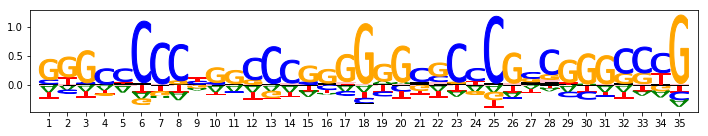

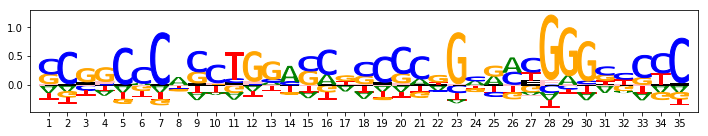

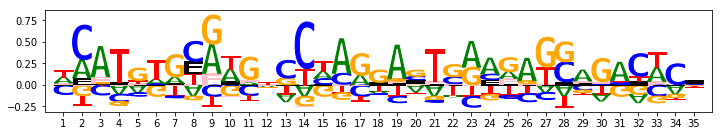

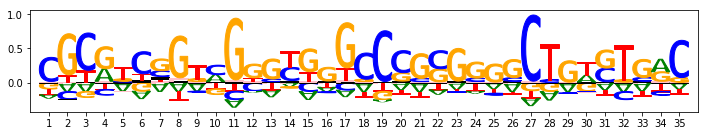

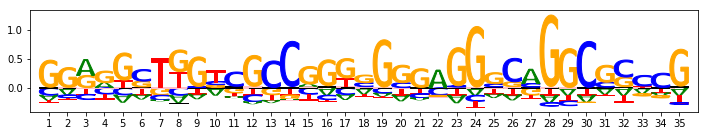

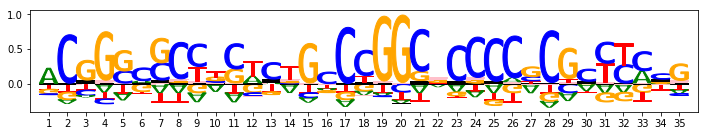

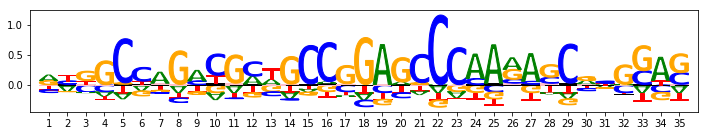

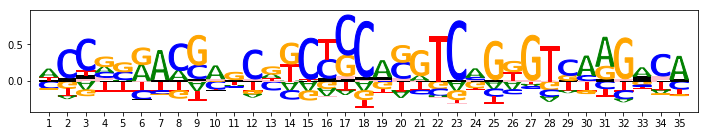

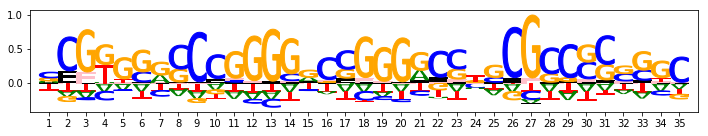

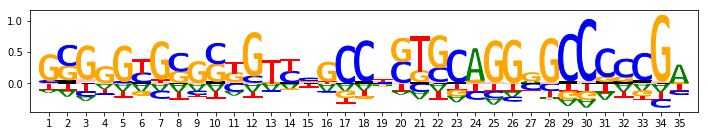

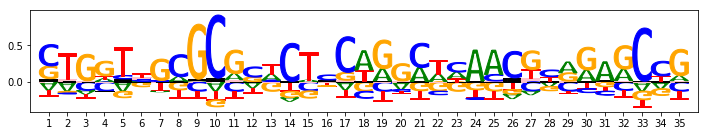

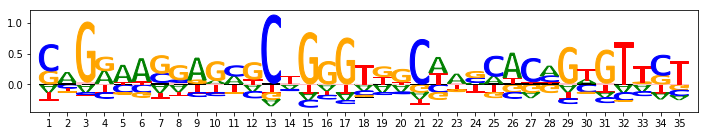

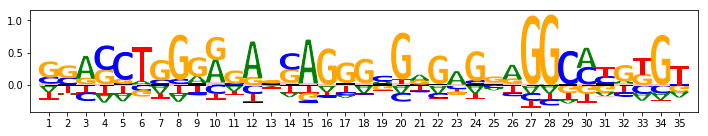

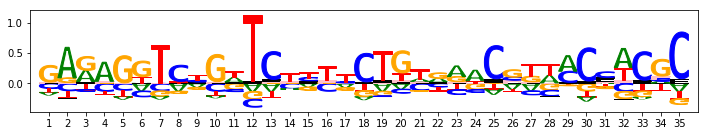

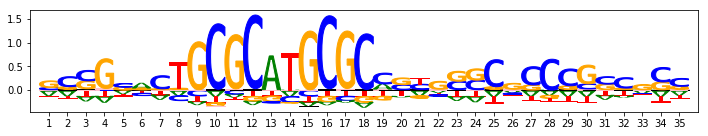

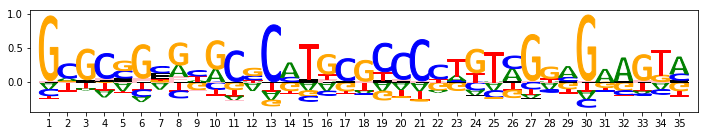

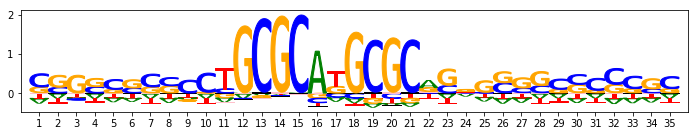

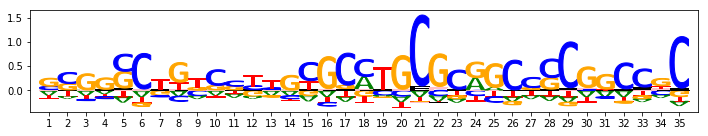

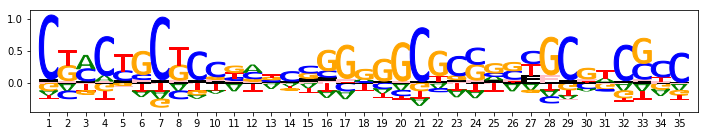

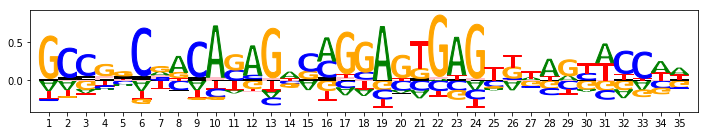

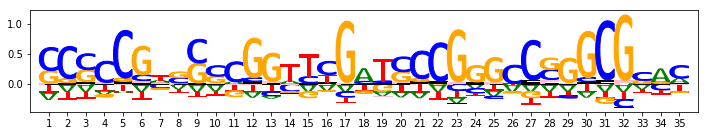

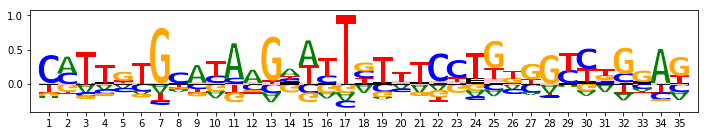

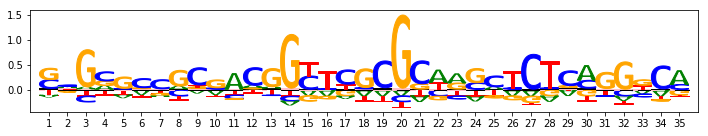

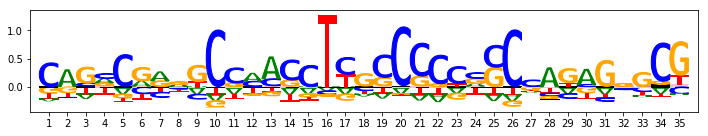

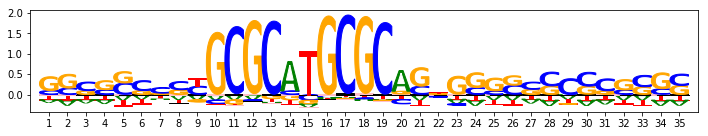

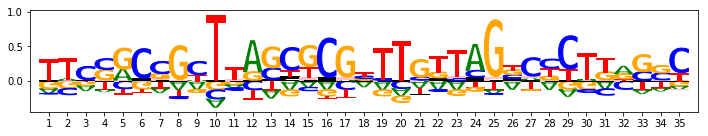

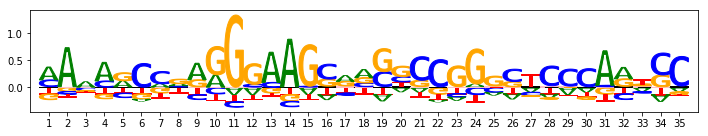

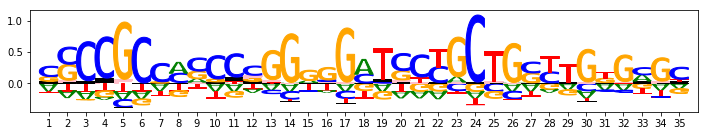

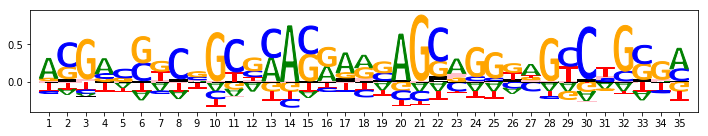

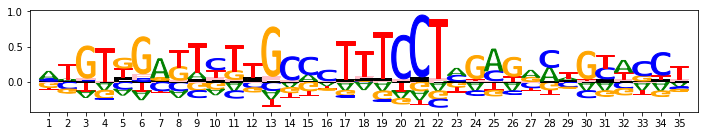

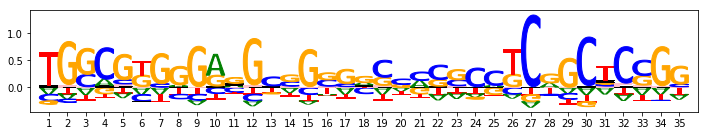

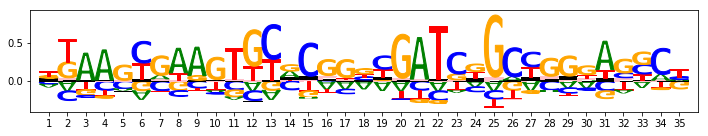

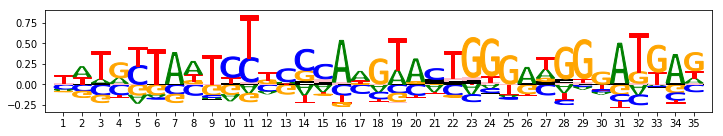

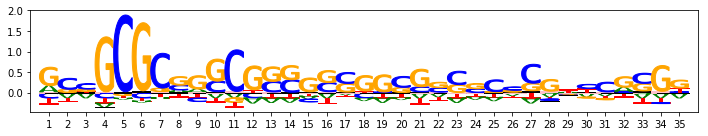

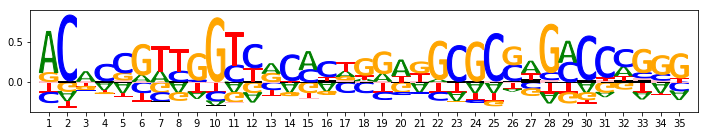

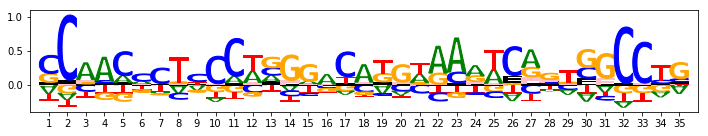

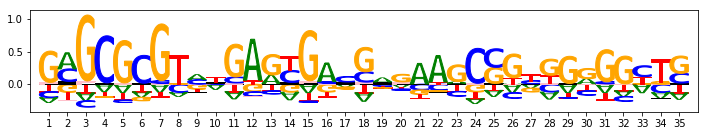

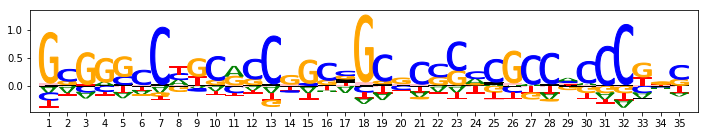

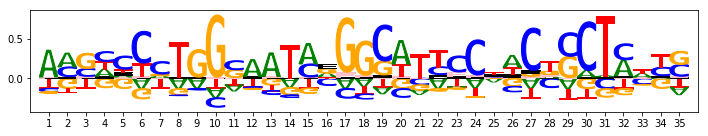

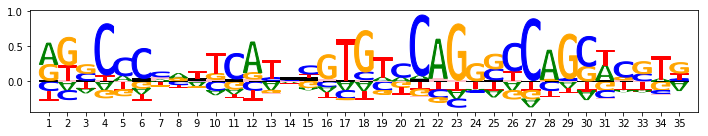

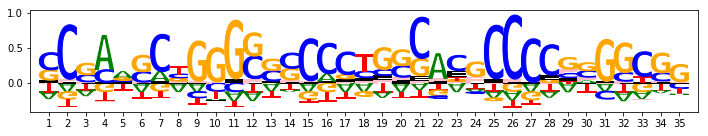

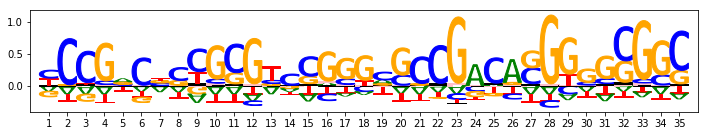

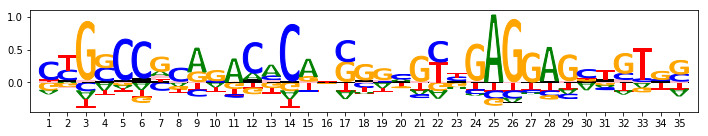

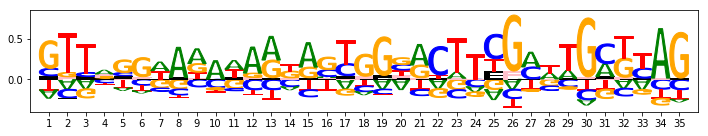

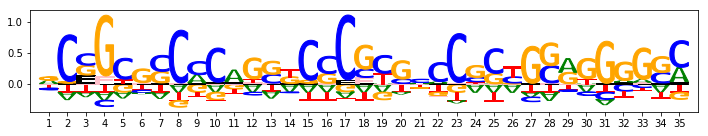

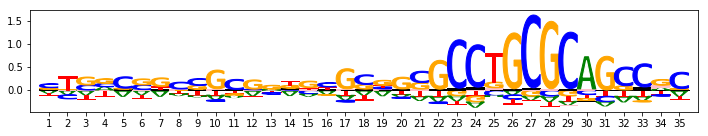

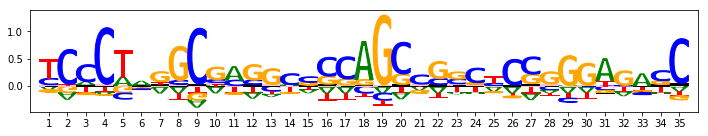

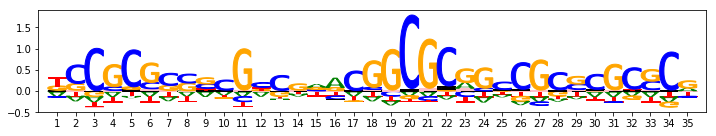

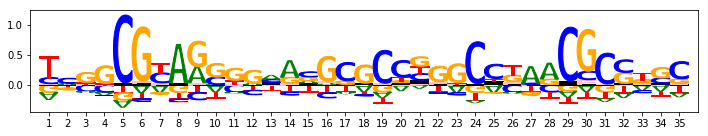

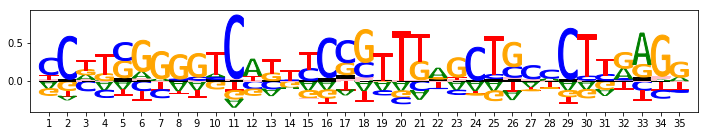

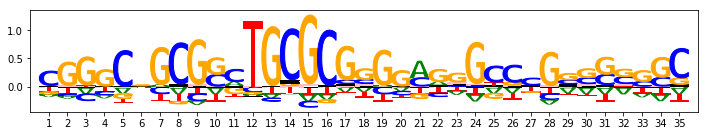

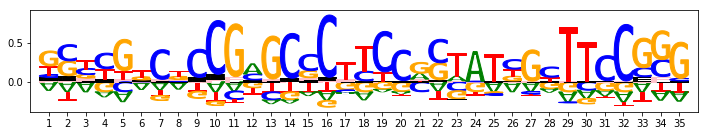

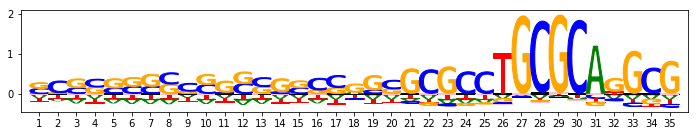

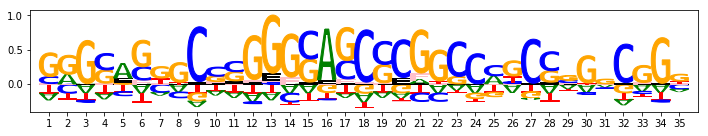

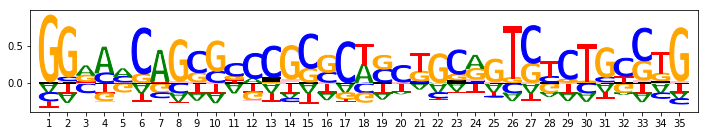

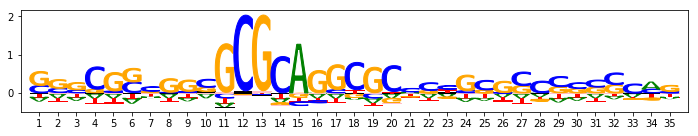

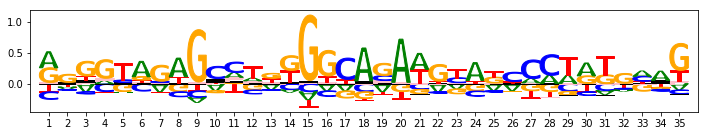

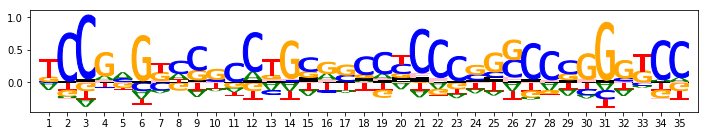

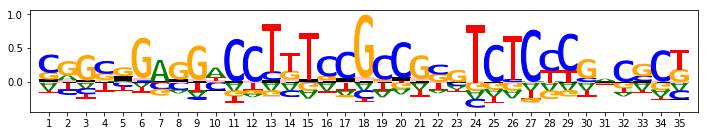

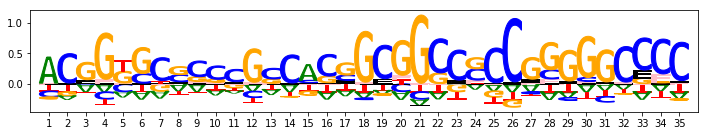

In [34]:
plot_and_save_information_content_pwms('./NRF1_motifs/',vocab='Meth_6_channel')

In [29]:
!ls ./tmp

pos_intervals.bed
